<h1><center>CS5710 – Machine Learning</center></h1>
<h2><center>Assignment-5</center></h2>

<div class="alert alert-block alert-success">
    <b> Name:  </b> Aravinda Krishna Gorantla </br>
    <b> 700#: </b> 700741775
</div>

<b>Programming elements: </b>
Clustering & Dimensionality reduction

### Importing required Modules/libraries for the Assignment

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC

<div class="alert alert-block alert-info">
    <b><h3>1. Principal Component Analysis</h3></b>
</div>

### Question 1. a
<font color='brown'><b>Apply PCA on CC dataset. </br>

In [2]:
# Loading the CC General csv file
df_CC = pd.read_csv('CC GENERAL.csv') 

# displaying the info
print(df_CC.info())

#displaying the first 5 rows of dataframe
df_CC.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# checking for null data in the dataset using isnull() function
df_CC.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [4]:
# replacing the null data with the mean by using fillena() function
df_CC.fillna(df_CC.mean(), inplace=True)

# checking for null data in the dataset using isnull() function, after replacing
df_CC.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [5]:
'''x is selecting all rows and all columns from the second column to the second-to-last column.
This is equivalent to selecting all columns except for the first and last columns'''
x = df_CC.iloc[:,1:-1]

# y is selecting all rows and only the last column that is TENURE
y = df_CC.iloc[:,-1]

# printing the shape of x and y, which is the number of rows and columns in each subset of data
print(x.shape,y.shape)

(8950, 16) (8950,)


In [6]:
# Applying PCA on CC Dataset 
# Datasets can be analyzed with PCA so that redundant features can be removed without losing too much information.
'''PCA(3)- performs principal component analysis (PCA) on dataset x, reducing the dimensionality 
of the data from the original number of features to 3 principal components.'''
pca = PCA(3)  #Instantiate PCA

'''fit_transform()- method of the PCA object is called on the data x to obtain a transformed version of the data, 
where each observation is represented by its three principal components.'''
x_pca = pca.fit_transform(x)

# creates a new DataFrame 'principalDf' with the transformed data, where each column corresponds to a principal component
principalDf = pd.DataFrame(data = x_pca, 
                           columns = ['principal component 1', 
                                      'principal component 2', 
                                      'principal component 3'])

'''creating a new DataFrame 'finalDf' using concat() function with the transformed data and 
the original target variable (the 'TENURE' column) for each observation.'''
finalDf = pd.concat([principalDf, 
                     df_CC.iloc[:,-1]], 
                    axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,TENURE
0,-4326.383979,921.566882,183.708383,12
1,4118.916665,-2432.846346,2369.969289,12
2,1497.907641,-1997.578694,-2125.631328,12
3,1394.548536,-1488.743453,-2431.799649,12
4,-3743.351896,757.342657,512.476492,12


### Question 1. b
<font color='brown'><b>Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?

In [7]:
''' X- predictor variable- contains all rows of finalDf except for the last column, 
representing the principal components generated by PCA'''
X = finalDf.iloc[:, 0:-1]

# y- target variable- contains only the last column of finalDf, representing the target variable.
y = finalDf.iloc[:, -1]

print(X.shape, y.shape)

(8950, 3) (8950,)


In [8]:
# Number of clusters
nclusters = 3

#Kmeans()- is used to perform Kmeans clustering on transformed data X with the specified number of clusters
km = KMeans(n_clusters=nclusters)

#fit()- method is called on the KMeans object to cluster the data.
km.fit(X)

''' predict() method is used to assign each data point to a cluster based on the clustering 
performed by K-means and cluster alignment is stored in y_cluster_kmeans'''
y_cluster_kmeans = km.predict(X)

# generates a confusion matrix that summarizes the number of TP, FP, TN, FN for each class
print('Confusion Matrix:\n', confusion_matrix(y, y_cluster_kmeans))

''' classification_report()- summary of predictions made by the classifier, 
Zero_division = parameter is set to 1 to avoid errors when a cluster is not assigned any data points.'''
print('\nclassification Report:\n', classification_report(y, y_cluster_kmeans, zero_division=1))

# computing the accuracy of the clustering results obtained using K-means algorithm
train_accuracy = accuracy_score(y, y_cluster_kmeans)
print("\nAccuracy for our Training dataset with PCA:", train_accuracy)

'''The silhouette score ranges from -1 to 1 and is a measure of how similar an object is to its own cluster 
compared to other clusters, where a higher score indicates better clustering'''
score = metrics.silhouette_score(X, y_cluster_kmeans)
print("Silhouette Score: ", score)

Confusion Matrix:
 [[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 175    1   28    0    0    0    0    0    0    0]
 [ 173    2   15    0    0    0    0    0    0    0]
 [ 169    0   27    0    0    0    0    0    0    0]
 [ 149    0   26    0    0    0    0    0    0    0]
 [ 188    1   47    0    0    0    0    0    0    0]
 [ 284    3   78    0    0    0    0    0    0    0]
 [5390  126 2068    0    0    0    0    0    0    0]]

classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       0.00      1.00      0.00       0.0
           2       0.00      1.00      0.00       0.0
           6       1.00      0.00      0.00     204.0
           7       1.00      0.00      0.00     190.0
           8       1.00      0.00      0.00     196.0
           9       1.00      0.00      0.00   

### Question 1. c
<font color='brown'><b>Perform Scaling+PCA+K-Means and report performance.

In [9]:
x = df_CC.iloc[:,1:-1]
y = df_CC.iloc[:,-1]
print(x.shape,y.shape)

(8950, 16) (8950,)


In [10]:
# Scale the dataset; This is very important before you apply PCA
scaler = StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)

'''PCA(3)- performs principal component analysis (PCA) on dataset x, reducing the dimensionality 
of the data from the original number of features to 3 principal components.'''
pca = PCA(3)

'''fit_transform()- method of the PCA object is called on the data x to obtain a transformed version of the data, 
where each observation is represented by its three principal components.'''
x_pca = pca.fit_transform(X_scaled_array)

# creates a new DataFrame 'principalDf' with the transformed data, where each column corresponds to a principal component
principalDf = pd.DataFrame(data = x_pca, 
                           columns = ['principal component 1', 
                                      'principal component 2',
                                      'principal component 3'])

'''creating a new DataFrame 'finalDf' using concat() function with the transformed data and 
the original target variable (the 'TENURE' column) for each observation.'''
finalDf = pd.concat([principalDf, 
                     df_CC.iloc[:,-1]], 
                    axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,TENURE
0,-1.718893,-1.072940,0.535662,12
1,-1.169306,2.509322,0.628084,12
2,0.938414,-0.382601,0.161150,12
3,-0.907502,0.045859,1.521708,12
4,-1.637830,-0.684976,0.425637,12


In [11]:
X = finalDf.iloc[:,0:-1]
y = finalDf["TENURE"]
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

(8950, 3) (8950,)


In [12]:
# Number of clusters
nclusters = 3

#Kmeans()- is used to perform Kmeans clustering on transformed data X with the specified number of clusters
km = KMeans(n_clusters=nclusters)

#fit()- method is called on the KMeans object to cluster the data.
km.fit(X_train,y_train)

''' predict() method is used to assign each data point to a cluster based on the clustering 
performed by K-means and cluster alignment is stored in y_cluster_kmeans'''
y_clus_train = km.predict(X_train)

# generates a confusion matrix that summarizes the number of TP, FP, TN, FN for each class
print('Confusion Matrix:\n',confusion_matrix(y_train, y_clus_train))

''' classification_report()- summary of predictions made by the classifier, 
Zero_division = parameter is set to 1 to avoid errors when a cluster is not assigned any data points.'''
print('\nclassification Report:\n', classification_report(y_train, y_clus_train, zero_division=1))

# computing the accuracy of the clustering results obtained using K-means algorithm
train_accuracy = accuracy_score(y_train, y_clus_train)
print("Accuracy for our Training dataset with PCA:", train_accuracy)

'''The silhouette score ranges from -1 to 1 and is a measure of how similar an object is to its own cluster 
compared to other clusters, where a higher score indicates better clustering'''
score = metrics.silhouette_score(X_train, y_clus_train)
print("Silhouette Score: ",score) 

Confusion Matrix:
 [[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 105    4   30    0    0    0    0    0    0    0]
 [ 108    1   26    0    0    0    0    0    0    0]
 [  96    4   28    0    0    0    0    0    0    0]
 [  89    2   27    0    0    0    0    0    0    0]
 [ 107    6   38    0    0    0    0    0    0    0]
 [ 185   11   66    0    0    0    0    0    0    0]
 [3393  739  842    0    0    0    0    0    0    0]]

classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       0.00      1.00      0.00       0.0
           2       0.00      1.00      0.00       0.0
           6       1.00      0.00      0.00     139.0
           7       1.00      0.00      0.00     135.0
           8       1.00      0.00      0.00     128.0
           9       1.00      0.00      0.00   

In [13]:
''' predict() method is used to assign each data point to a cluster based on the clustering 
performed by K-means and cluster alignment is stored in y_cluster_kmeans'''
y_clus_test = km.predict(X_test)

# generates a confusion matrix that summarizes the number of TP, FP, TN, FN for each class
print('Confusion Matrix:\n', confusion_matrix(y_test, y_clus_test))

''' classification_report()- summary of predictions made by the classifier, 
Zero_division = parameter is set to 1 to avoid errors when a cluster is not assigned any data points.'''
print('\n classification Report:\n', classification_report(y_test, y_clus_test, zero_division=1))

# computing the accuracy of the clustering results obtained using K-means algorithms
train_accuracy = accuracy_score(y_test, y_clus_test)
print("\nAccuracy for our Training dataset with PCA:", train_accuracy)

'''The silhouette score ranges from -1 to 1 and is a measure of how similar an object is to its own cluster 
compared to other clusters, where a higher score indicates better clustering'''
score = metrics.silhouette_score(X_test, y_clus_test)
print("Silhouette Score: ",score)

Confusion Matrix:
 [[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [  41    3   21    0    0    0    0    0    0    0]
 [  42    1   12    0    0    0    0    0    0    0]
 [  57    1   10    0    0    0    0    0    0    0]
 [  35    0   22    0    0    0    0    0    0    0]
 [  63    5   17    0    0    0    0    0    0    0]
 [  69    4   30    0    0    0    0    0    0    0]
 [1763  397  450    0    0    0    0    0    0    0]]

 classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00       0.0
           1       0.00      1.00      0.00       0.0
           2       0.00      1.00      0.00       0.0
           6       1.00      0.00      0.00      65.0
           7       1.00      0.00      0.00      55.0
           8       1.00      0.00      0.00      68.0
           9       1.00      0.00      0.00  

#### Observation: 
    
The Silhouette score is reduced after performing the scaling, so this data need not be undergone with scaling.

<div class="alert alert-block alert-info">
    <b><h3>2. Use pd_speech_features.csv</h3></b>
</div>

### Question 2. a
<font color='brown'><b>Perform Scaling

In [14]:
dataset_pd = pd.read_csv('pd_speech_features.csv')
print(dataset_pd.info())
dataset_pd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [15]:
dataset_pd.isnull().any()

id                           False
gender                       False
PPE                          False
DFA                          False
RPDE                         False
                             ...  
tqwt_kurtosisValue_dec_33    False
tqwt_kurtosisValue_dec_34    False
tqwt_kurtosisValue_dec_35    False
tqwt_kurtosisValue_dec_36    False
class                        False
Length: 755, dtype: bool

In [16]:
# dropping the target variable class from main data frame and creates a new data fram X
X = dataset_pd.drop('class',axis=1).values

# Y returns the class column which is a target variable from the main data frame 
y = dataset_pd['class'].values

#Scaling Data
'''StandardScaler to scale the input X, this is important as it ensures that all the features are on the same scale 
and prevents features with larger magnitude from dominating the distance calculations'''
sc = StandardScaler()

# Applies the fit_transform() method of the StandardScaler instance to the feature matrix X to perform feature scaling
X_Scale = sc.fit_transform(X)

### Question 2. b
<font color='brown'><b>Apply PCA (k=3)

In [17]:
# Apply PCA with k =3
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'Principal Component 3'])

finalDf = pd.concat([principalDf, 
                     dataset_pd[['class']]], 
                    axis = 1)
finalDf.head()

,principal component 1,principal component 2,Principal Component 3,class
0,-10.047372,1.471077,-6.846407,1
1,-10.637725,1.583750,-6.830977,1
2,-13.516185,-1.253542,-6.818699,1
3,-9.155084,8.833599,15.290915,1
4,-6.764470,4.611465,15.637133,1


### Question 2. c
<font color='brown'><b>Use SVM to report performance

In [18]:
X = finalDf.drop('class',axis=1).values
y = finalDf['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

In [19]:
# Creating an instance of the SVM classifier with default hyperparameters.
svmClassifier = SVC()

# Fitting the training data X_train and y_train to the SVM classifier.
svmClassifier.fit(X_train, y_train)

# Predicting the target variable using the test set X_test.
y_pred = svmClassifier.predict(X_test)

# Summary of the predictions made by the classifier
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nclassification Report:\n', classification_report(y_test, y_pred, zero_division=1))

# Accuracy score
glass_acc_svc = accuracy_score(y_pred,y_test)
print('accuracy is', glass_acc_svc )

#Calculate silhouette Score
score = metrics.silhouette_score(X_test, y_pred)
print("Silhouette Score: ", score)

Confusion Matrix:
 [[ 26  36]
 [ 13 183]]

classification Report:
               precision    recall  f1-score   support

           0       0.67      0.42      0.51        62
           1       0.84      0.93      0.88       196

    accuracy                           0.81       258
   macro avg       0.75      0.68      0.70       258
weighted avg       0.80      0.81      0.79       258

accuracy is 0.810077519379845
Silhouette Score:  0.2504463899791047


<div class="alert alert-block alert-info">
    <b><h3>3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.</h3></b>
</div>

In [20]:
# Loading the dataset
df_iris = pd.read_csv('Iris.csv')
print(df_iris.info())
df_iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df_iris.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [22]:
x = df_iris.iloc[:,1:-1].values
y = df_iris.iloc[:,-1].values
print(x.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

(150, 4) (150,)


In [23]:
sc = StandardScaler()

# fit and transform the scaler object on our training data and only transform our test data.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LabelEncoder to encode our target variable y into numerical values.
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

# (LDA) is used to perform dimensionality reduction on our input features x. 
# Here, we are reducing the number of input features to 2 using n_components=2
lda = LDA(n_components=2)

# we transform our training and test data using the fit_transform and transform methods of the LDA object respectively
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
print(X_train.shape, X_test.shape)

(105, 2) (45, 2)


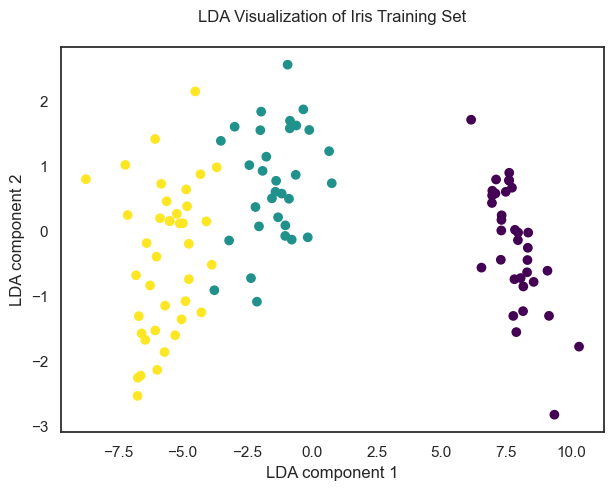

In [24]:
# Plot the training set
plt.figure(figsize=(7, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.title('LDA Visualization of Iris Training Set\n')
plt.show()

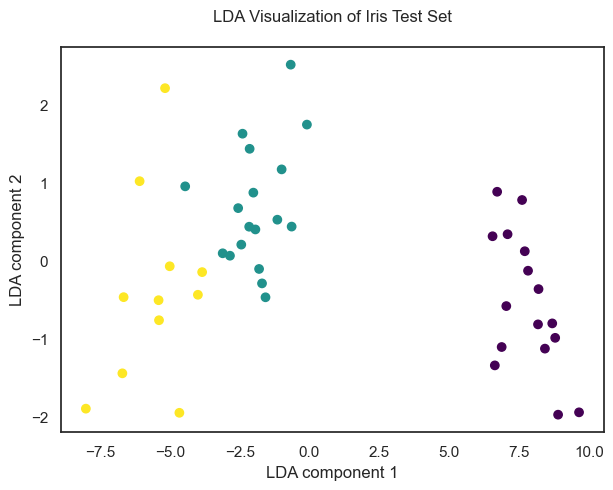

In [25]:
# Plot the test set
plt.figure(figsize=(7, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.title('LDA Visualization of Iris Test Set\n')
plt.show()

<div class="alert alert-block alert-info">
    <b><h3>4. Briefly identify the difference between PCA and LDA</h3></b>
</div>

### Answer:
Machine learning and data analysis commonly use dimensionality reduction techniques, which include Principal Component Analysis (PCA) and Linear Discriminant Analysis (LDA).

By discovering new features that are linear combinations of the original features, PCA is an unsupervised technique that lowers the dimensionality of the data. According to how much variance in the data they account for, these additional attributes are ranked. PCA seeks to maximize data variance while using the fewest possible characteristics.

LDA, on the other hand, is a supervised approach that maximizes the separation between several classes while projecting the data into a lower-dimensional space. Finding a new feature space with well-separated classes in the data is the aim of LDA. The goal of LDA is to maximize the difference between-class variance and within-class variance ratio.

In conclusion, LDA is a supervised method that seeks to identify features that maximize class separability, in contrast to PCA, which is an unsupervised method that strives to retain the general structure of the data by maximizing variance.

<h1><center> <i>- - - End - - -</i></center></h1>